#Keras

Mario Fiorino


Le API di TensorFlow sono organizzate gerarchicamente, con quelle di alto livello che si basano su quelle di basso livello.

I ricercatori di machine learning utilizzano le API di basso livello per creare ed esplorare nuovi algoritmi.

tf.keras è un'API di alto livello che consente di costruire ed addestrare semplici modelli di machine learning in modo facile (User-Friendly ) e veloce.

Ref:

https://keras.io/guides/

https://keras.io/getting_started/faq/

https://github.com/keras-team/keras/tree/v3.1.1/keras




*

https://elearning.di.unipi.it/pluginfile.php/16483/course/section/1837/%5BISPR%5D%20Intro%20to%20Machine%20Learning%20with%20Keras.pdf


*

https://github.com/jeffheaton/t81_558_deep_learning



https://developers.google.com/machine-learning/crash-course/first-steps-with-tensorflow/programming-exercises?hl=it



*


https://keras.io/guides/custom_train_step_in_tensorflow/


https://keras.io/api/utils/python_utils/#sequence-class





<div>
<img src="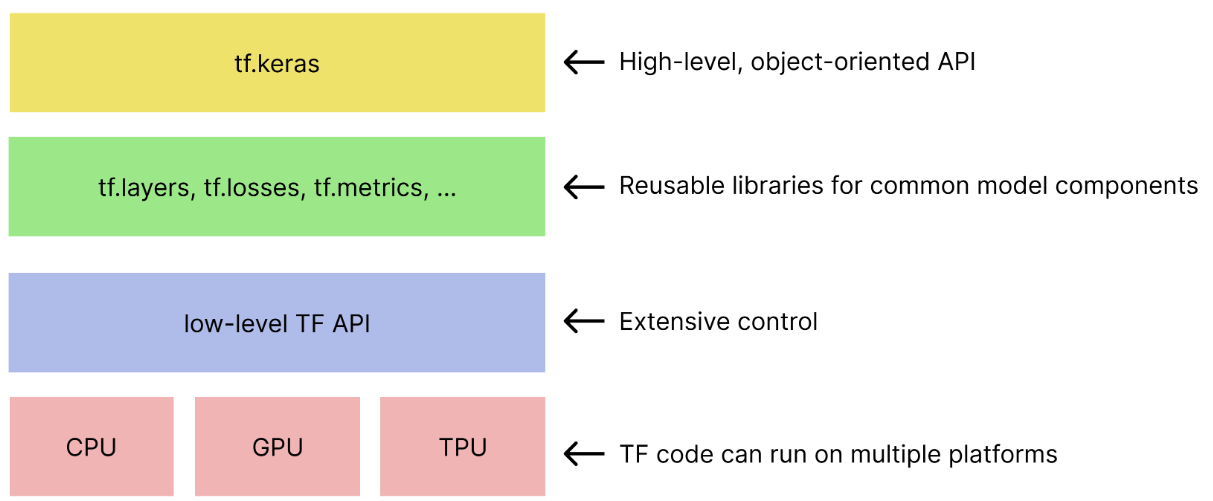
", width="500">
</div>

Riproponiamo la stessa architettura di rete neurale vista nel notebook precedente (Introduzione TensorFlow_v2_parte2_ITA), avvalendoci però della libreria Keras per la sua implementazione.

Per considerazioni teoriche si consiglia di consultare il notebook:

Introduzione TensorFlow_v2_parte2_ITA

In [ ]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

from keras import initializers
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

TensorFlow version: 2.15.0


#### Chiarimenti tecnici su Keras

In [ ]:
# NN ad uno strato, 3 nodi, 2 input, funzione di attivazione : Sigmoid

model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Dense(units=3,
                                  input_dim=2,
                                  kernel_initializer=initializers.RandomNormal(mean=0.0, stddev=0.1, seed=None),
                                  bias_initializer=initializers.Zeros(),
                                  activation='sigmoid') )

y =model.predict([[0,2]])
print(y)

1/1 [==============================] - 0s 61ms/step
[[0.4896491 0.5199425 0.5379917]]


In [ ]:
# Come funzione Accuracy in Keras

#https://keras.io/api/metrics/accuracy_metrics/#accuracy-class

prev =     [[1], [1], [1], [4]]
test_set = [[0], [2], [3], [4]]

m = tf.keras.metrics.Accuracy()
m.update_state(test_set, prev)
m.result().numpy()

0.25

In [ ]:
#Loss function e batch size in Keras
#1.

# https://keras.io/api/losses/


k1 = tf.ones((1,))*5
print(k1)
k2 = tf.ones((1, ))*2
print(k2)
#z = tf.zeros((2,2 ))
d = tf.keras.losses.MeanSquaredError(reduction='none')(k1, k2)
# "none" means the loss instance will return the full array of sample losses.
print(d,"\n")  # (5-2)^2 -> 9/1 = 9


k1 = tf.constant([0, 7, 5])
print(k1)
k2 = tf.constant([1, 2, 1])
print(k2)
d = tf.keras.losses.MeanSquaredError(reduction='none')(k1, k2)
print(d,"\n") # 1^2 + 5^2 + 4^2 = 42 -> 42/3 = 14


k1 = tf.constant([[0, 5, 0],[1, 2, 3]])
print(k1)
k2 = tf.constant([[1, 1, 0],[0, 3, 0]])
print(k2)
d = tf.keras.losses.MeanSquaredError(reduction='none')(k1, k2)
print(d,"\n") # 1^2 + 4^2 + 0 ->  15/3 ; 1^2 + 1^2 + 3^2 -> 11/3

tf.Tensor([5.], shape=(1,), dtype=float32)
tf.Tensor([2.], shape=(1,), dtype=float32)
tf.Tensor(9.0, shape=(), dtype=float32) 

tf.Tensor([0 7 5], shape=(3,), dtype=int32)
tf.Tensor([1 2 1], shape=(3,), dtype=int32)
tf.Tensor(14, shape=(), dtype=int32) 

tf.Tensor(
[[0 5 0]
 [1 2 3]], shape=(2, 3), dtype=int32)
tf.Tensor(
[[1 1 0]
 [0 3 0]], shape=(2, 3), dtype=int32)
tf.Tensor([5 3], shape=(2,), dtype=int32) 



In [ ]:
#Loss function e batch size in Keras
#2.
# "sum_over_batch_size" means the loss instance will return the average of the sample losses in the batch.

k1 = tf.ones((1,))*5
print(k1)
k2 = tf.ones((1, ))*2
print(k2)
#z = tf.zeros((2,2 ))
d = tf.keras.losses.MeanSquaredError(reduction='sum_over_batch_size')(k1, k2)
# "none" means the loss instance will return the full array of per-sample losses.
print(d,"\n")  # (5-2)^2 -> 9/1 = 9


k1 = tf.constant([0, 7, 5])
print(k1)
k2 = tf.constant([1, 2, 1])
print(k2)
d = tf.keras.losses.MeanSquaredError(reduction='sum_over_batch_size')(k1, k2)
print(d,"\n") # 1^2 + 5^2 + 4^2 = 42 -> 42/3 = 14


k1 = tf.constant([[0, 5, 0],[1, 2, 3]])
print(k1)
k2 = tf.constant([[1, 1, 0],[0, 3, 0]])
print(k2)
d = tf.keras.losses.MeanSquaredError(reduction='sum_over_batch_size')(k1, k2)
print(d,"\n") # tf.Tensor([5 3] -> (5+3)/2


#
# NOTA IMPORTANTE
# When using fit(), this difference is irrelevant since reduction is handled by the framework.
#


tf.Tensor([5.], shape=(1,), dtype=float32)
tf.Tensor([2.], shape=(1,), dtype=float32)
tf.Tensor(9.0, shape=(), dtype=float32) 

tf.Tensor([0 7 5], shape=(3,), dtype=int32)
tf.Tensor([1 2 1], shape=(3,), dtype=int32)
tf.Tensor(14, shape=(), dtype=int32) 

tf.Tensor(
[[0 5 0]
 [1 2 3]], shape=(2, 3), dtype=int32)
tf.Tensor(
[[1 1 0]
 [0 3 0]], shape=(2, 3), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32) 



In [ ]:
#Loss function e batch size in Keras
#3.

k1 = tf.ones((2,3))*5
print(k1)
k2 = tf.ones((2,3))*2
print(k2)
d = tf.keras.losses.MeanSquaredError(reduction='auto')(k1, k2)
d1 = tf.keras.losses.MeanSquaredError()(k1, k2)
print(d,"\n",d1)

# Default value is auto: reduction='auto'
# auto indicates that the reduction option will be determined by the usage context.


tf.Tensor(
[[5. 5. 5.]
 [5. 5. 5.]], shape=(2, 3), dtype=float32)
tf.Tensor(
[[2. 2. 2.]
 [2. 2. 2.]], shape=(2, 3), dtype=float32)
tf.Tensor(9.0, shape=(), dtype=float32) 
 tf.Tensor(9.0, shape=(), dtype=float32)


####Importa il dataset MNIST ed esegui la Data Preparation

In [ ]:
(xtrain,label_train),(xtest,label_test)=tf.keras.datasets.mnist.load_data()

num_pixels = (xtrain[0].shape[0]) * (xtrain[0].shape[0])
print(num_pixels,"\n")

# flatten 28*28 pixel images to a 784 vector
xtrain = xtrain.reshape(xtrain.shape[0], num_pixels).astype('float32')
xtest = xtest.reshape(xtest.shape[0], num_pixels).astype('float32')

# normalize inputs from 0-255 to 0-1
xtrain = xtrain / 255
xtest = xtest / 255
print(xtrain[0].shape,"\n")

# one hot encode outputs
label_train = tf.keras.utils.to_categorical(label_train) # utils is tools for creating one-hot encoding
label_test = tf.keras.utils.to_categorical(label_test)
print(label_train[0])

11490434/11490434 [==============================] - 1s 0us/step
784 

(784,) 

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


#### Definizioni dei parametri del processo di training

In [ ]:
#Parametri

#number of neurons in input layer
num_input = 784

#number of neurons in hidden layer 1
num_hidden1 = 128

#number of neurons in hidden layer 2
num_hidden2 = 64

#number of neurons in output layer
num_output = 10

flag_summery = True

n_layers = [num_input, num_hidden1, num_hidden2, num_output]

# Number of epochs
num_iterations = 20

learning_rate=0.001

# Number of samples per gradient update
my_batch_size= 16

#
#Suggerimenti da Google:
#

#Setting the batch size to a very small batch number can also cause instability.
#First, try large batch size values. Then, decrease the batch size until you see degradation

#If the training loss decreases too slowly, increase the learning rate. Note that setting the learning rate too high may also prevent training loss from converging.

#If the training loss varies wildly (that is, the training loss jumps around), decrease the learning rate.

#Lowering the learning rate while increasing the number of epochs or the batch size is often a good combination.

#### Definizione dell'architettura della rete neurale

In [ ]:
#I modelli tf.keras più semplici sono Sequential() - Di fatto una pila lineare a più livelli.
  # Un modello sequenziale può contenere uno o più layer.
  # Per architetture più complesse, si può utilizzare: https://keras.io/guides/functional_api/
model = tf.keras.models.Sequential()

##Layer1
# Dense layers, oppure, fully-connected layers :
# Dense implementa l'operazione : output = function_activation(dot(input, kernel) + bias)
# dove: kernel è la  weights matrix
model.add(tf.keras.layers.Dense(units=n_layers[1],       # units = il numero dei nodi - ovvero l'output space -
                                  input_dim=n_layers[0],   # input_dim = dimensioni del Input Layer, oppure, Number of Input Feature model
                                  kernel_initializer=initializers.RandomNormal(mean=0.0, stddev=0.1, seed=None),
                                  bias_initializer=initializers.Zeros(),
                                  activation='relu') )


##Layer2
model.add(tf.keras.layers.Dense(units=n_layers[2],
                                  input_dim=n_layers[1],
                                  kernel_initializer=initializers.RandomNormal(mean=0.0, stddev=0.1, seed=None),
                                  bias_initializer=initializers.Zeros(),
                                  activation='relu') )


##Layer3
model.add(tf.keras.layers.Dense(units=n_layers[3],
                                  input_dim=n_layers[2],
                                  kernel_initializer=initializers.RandomNormal(mean=0.0, stddev=0.1, seed=None),
                                  bias_initializer=initializers.Zeros(),
                                  activation='softmax') )

# Compile the model
  # Ovvero :  configura il suo processo di apprendimento
  # Configurare il processo di learning per ridurre al minimo la funzione di loss scelta.
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                loss= tf.keras.losses.CategoricalCrossentropy(from_logits=False),
                metrics=[tf.keras.metrics.CategoricalAccuracy()])


  # Per stampa le info del modello creato
if flag_summery == True:
      model.summary()
      #tf.keras.utils.plot_model(model)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 109386 (427.29 KB)
Trainable params: 109386 (427.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


####Capire il processo il Training model.fit() in Keras

#####Versione base sull'utilizzo di  model.fit()

Questa versione base, da un idea di come lavora model.fit()

Qui si lavora inserendo un elemento per volta, in pratica variando ogni volta il "dataset" di input in model.fit

Accuracy Ante-training
1/1 [==============================] - 0s 188ms/step - loss: 2.4895 - categorical_accuracy: 0.0830

 --- 

Inizio Training

Epoca:  200
1/1 - 0s - loss: 0.7195 - categorical_accuracy: 1.0000 - 380ms/epoch - 380ms/step

Epoca:  400
1/1 - 0s - loss: 0.3178 - categorical_accuracy: 1.0000 - 5ms/epoch - 5ms/step

Epoca:  600
1/1 - 0s - loss: 0.2784 - categorical_accuracy: 1.0000 - 5ms/epoch - 5ms/step

Epoca:  800
1/1 - 0s - loss: 1.1461 - categorical_accuracy: 0.0000e+00 - 5ms/epoch - 5ms/step

Epoca:  1000
1/1 - 0s - loss: 0.0063 - categorical_accuracy: 1.0000 - 9ms/epoch - 9ms/step

Fine del training

Accuracy Post
1/1 [==============================] - 0s 133ms/step - loss: 0.6024 - categorical_accuracy: 0.8078
[0.6023693084716797, 0.8077999949455261]

 --- 

Test su alcuni campioni
313/313 [==============================] - 1s 2ms/step


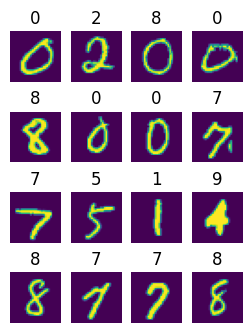

In [ ]:
#Test sul modello iniziale
print("Accuracy Ante-training")
s = model.evaluate(xtest, label_test, len(xtest))
print("\n --- \n")

print("Inizio Training")
num_iterations = 1_000

for i in range(num_iterations+1):

    #Pesca random x  e y dal training_dataset
    ri = np.random.randint(low=0, high=len(xtrain))
    x = xtrain[ri]
    x = tf.reshape(x, [1, -1])
    y = label_train[ri]
    y = tf.reshape(y, [1, -1])

    if (i > 0) and ( (i % (num_iterations/5)) == 0) :
       print("\nEpoca: ",i)
       model.fit(x=(x,),
                 y=(y,),
                 batch_size=1,
                 epochs=1,
                 verbose=2)

    else:
       model.fit(x=(x),
                 y=(y),
                 batch_size=1,
                 epochs=1,
                 verbose=0)

print("\nFine del training\n")


#accuracy sul modello addestrato
print("Accuracy Post")
s = model.evaluate(xtest, label_test, len(xtest))
print(s)
print("\n --- \n")


# Testiamo alcuni campioni
print("Test su alcuni campioni")
pred = model.predict(xtest)
pred = list(map(lambda x: np.argmax(x), pred))
#print(pred)

plt.figure(figsize=(3, 4))

for i in range(16):
    ri = np.random.randint(low=0, high=len(xtest))
    ax = plt.subplot(4, 4, i + 1)
    image = np.squeeze(xtest[ri])
    image = image.reshape(28, 28)
    plt.imshow(image)
    plt.title(pred[ri])
    plt.axis('off')

##### Versione più sofisticata sull'utilizzo di model.fit()  - usiamo un dataset di soli 10 elementi

Qui possiamo capire meglio il lavoro in modelp.fit() di shuffle=True/False, steps_per_epoch, batch_size

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


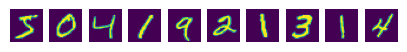

In [ ]:
# Creo un piccolo dataset di prova di soli 10 elementi

xn = xtrain[:10]
xl = label_train[:10]

plt.figure(figsize=(5, 10))
for i in range(10):
    ax = plt.subplot(1, 10, i + 1)
    image = np.squeeze(xn[i])
    image = image.reshape(28, 28)
    plt.imshow(image)
    plt.axis('off')

print(xl)

Epoch 1/3

New batch:
Input Picture
Input Label
[[0 1 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1]]
------------------ batch: 0 ------------------

1/2 [==============>...............] - ETA: 0s - loss: 2.3026 - categorical_accuracy: 0.0000e+00
New batch:
Input Picture
Input Label
[[0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0]]
------------------ batch: 1 ------------------

2/2 [==============================] - 0s 159ms/step - loss: 2.3025 - categorical_accuracy: 0.1000
Epoch 2/3

New batch:
Input Picture
Input Label
[[0 0 1 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0]]
------------------ batch: 0 ------------------

1/2 [==============>...............] - ETA: 0s - loss: 2.2810 - categorical_accuracy: 0.4000
New batch:
Input Picture
Input Label
[[0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0]
 [0

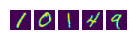

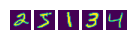

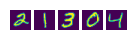

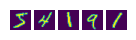

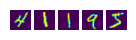

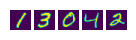

In [ ]:
#Qui possiamo capire meglio il lavoro in modelp.fit() di shuffle=True/False, steps_per_epoch, batch_size
# sfruttando il dataset di 10 elementi creato


tf.config.run_functions_eagerly(True)
#Tensorflow 2 has a config option to run functions "eagerly" which will enable getting Tensor values via .numpy() method.
# serve per l'istruzione : print(tf.keras.backend.get_value(x))


model = tf.keras.models.Sequential()
#Layer1
model.add(tf.keras.layers.Dense(units=64,       # units = il numero dei nodi - ovvero l'output space -
                                  input_dim=n_layers[0],   # input_dim = dimensioni del Input Layer, oppure, Number of Input Feature model
                                  kernel_initializer=initializers.RandomNormal(mean=0.0, stddev=0.01, seed=None),
                                  bias_initializer=initializers.Zeros(),
                                  activation='relu') )

##Layer2
model.add(tf.keras.layers.Dense(units=32,
                                  input_dim=64,
                                  kernel_initializer=initializers.RandomNormal(mean=0.0, stddev=0.01, seed=None),
                                  bias_initializer=initializers.Zeros(),
                                  activation='relu') )

##Layer3
model.add(tf.keras.layers.Dense(units=n_layers[3],
                                  input_dim=32,
                                  kernel_initializer=initializers.RandomNormal(mean=0.0, stddev=0.01, seed=None),
                                  bias_initializer=initializers.Zeros(),
                                  activation='softmax') )


class printeverybatch(tf.keras.Model):
    def train_step(self, data):

        x, y = data

        tf.print('\nNew batch:')
        tf.print('Input Picture')

        #tf.print(x,summarize=-1, name='x_value')

        x1 = tf.keras.backend.get_value(x[0])
        x2 = tf.keras.backend.get_value(x[1])
        x3 = tf.keras.backend.get_value(x[2])
        x4 = tf.keras.backend.get_value(x[3])
        x5 = tf.keras.backend.get_value(x[4])

        xf = x1.reshape(28, 28)
        xf2 = x2.reshape(28, 28)
        xf3 = x3.reshape(28, 28)
        xf4 = x4.reshape(28, 28)
        xf5 = x5.reshape(28, 28)

        plt.figure(figsize=[1.5, 1.5])
        c = 1
        for i in (xf,xf2,xf3,xf4,xf5):
          ax = plt.subplot(1,5,c)
          c= c + 1
          image = i
          plt.imshow(image)
          plt.axis('off')


        #plt.figure(figsize=[0.6, 0.6])
        #plt.imshow(xf, cmap=plt.get_cmap('gray'))
        #plt.imshow(xf)
        #plt.axis('off')
        #plt.show()

        tf.print('Input Label')
        tf.print(y,summarize=-1)
        return super().train_step(data)


class MyCustomCallback(tf.keras.callbacks.Callback):
  def on_train_batch_end(self, batch, logs=None):
    #keys = list(logs.keys())
    print("------------------ batch: {} ------------------\n".format(batch))


modelp=printeverybatch(inputs = model.input, outputs = model(model.input))



modelp.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                loss= tf.keras.losses.CategoricalCrossentropy(from_logits=False),
                metrics=[tf.keras.metrics.CategoricalAccuracy()])


num_iterations = 3
learning_rate=0.01
my_batch_size= 5
nr_steps_epoch = None

modelp.fit(x=xn,
                    y=xl,
                    batch_size=my_batch_size,
                    epochs=num_iterations,
                    shuffle=True,
                    steps_per_epoch = nr_steps_epoch,
                    callbacks=[MyCustomCallback()],
                    verbose=1) # Verbosity mode : "auto", 0, 1, or 2.


Considerazioni dopo diverse sperimentazioni



Riferimento : Dataset compoosto dai i soli 10 elementi iniziali dal dataset originale.

Settando

             shuffle=True
             num_iterations = 3
             learning_rate=0.01
             my_batch_size= 1
             nr_steps_epoch = None


Keras pesca uno alla volta tutti gli elementi del dataset senza ripetizioni all'interno di ogni epoca.   L'ordine di uscita dei campioni è random, questo vale per tutte e 3 le epoche (in prarica l'ordine di uscita varia ad ogni epoca).


$\;$

Se

nr_steps_epoch > del numero dei casi nel dataset

             nr_steps_epoch = 12


Keras estrae i primi 10 elementi, tutti diversi tra loro., l'undicesimo e dodiscesimo sono ripetizoini.
Nell'iterazione successivesi ci sono ripetizioni sparse e si conclude:

6/12 [==============>...............] - ETA: 0s - loss: 2.1153 - categorical_accuracy: 0.1667    

WARNING:tensorflow:Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches (in this case, 36 batches). You may need to use the repeat() function when building your dataset

$\;$

Settando


             shuffle=True
             num_iterations = 3
             learning_rate=0.01
             my_batch_size= 5
             nr_steps_epoch = None


Keras estrae 5 campioni per volta dal dataset, in ordine random, e sfruttando tutti i 10 elementi del dataset. Non vi sono duplicati di campioni all'interno di una singola epoca.




In più, sfrutta la Vettorizzazione, ed il training è estremamente veloce

Discorsi simile con

             shuffle=True
             num_iterations = 3
             learning_rate=0.01
             my_batch_size= 2
             nr_steps_epoch = None



Invece con



             shuffle=True
             num_iterations = 3
             learning_rate=0.01
             my_batch_size= 4
             nr_steps_epoch = 2 o con None

Keras lavora senza problemi sulla prima epoca pescando 8 elementi in oridne random, tutti diversi. All'inizio della seconda epoca:

InvalidArgumentError: {{function_node __wrapped__StridedSlice_device_/job:localhost/replica:0/task:0/device:CPU:0}} slice index 2 of dimension 0 out of bounds. [Op:StridedSlice] name: strided_slice/


$\;$

Infine

             shuffle=True
             num_iterations = 3
             learning_rate=0.01
             my_batch_size= 2
             nr_steps_epoch = 4

Il risultato viene mostrato nella figura successiva; ovvero nel riquadro verde i batch(2 campioni) estratti per ogni epoca (4), per un totale di 8 campioni. In rosso esecuzione di un ciclo completo sul dataset: 10 campioni.
Nel riquadro rosso non ci sono ripetizioni; nel verde sì, ad eccezione della prima epoca.  

Sembra che settando "Shuffle = True", dopo un primo shuffle ad inizio training, il dataset venga completamente esaurito (estratto nella sua interezza) prima di essere nuovamente ri-mescolato.


<div>
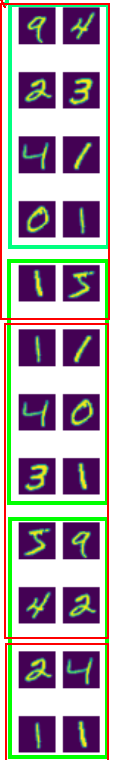
</div>

##### Versione più sofisticata sull'utilizzo di model.fit()  - usiamo l'intero MNIST database

Epoch 1/2

New batch:
Input Picture

Input Label
[[0 0 0 0 1 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]]
------------------ batch: 0 ------------------


New batch:
Input Picture

Input Label
[[0 0 0 1 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0]]
------------------ batch: 1 ------------------


New batch:
Input Picture

Input Label
[[0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0]
 [1 0 0 0 0 0 0 0 0 0]]
------------------ batch: 2 ------------------


New batch:
Input Picture

Input Label
[[0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 1 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]]
------------------ batch: 3 ------------------

4/4 - 1s - loss: 2.2999 - categorical_accuracy: 0.2500 - 606ms/epoch - 152ms/step
Epoch 2/2

New batch:
Input Picture

Input Label
[[0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]]
------------------ batch: 0 ------------------


New batch:
Input Picture

Input Label
[[0 0 0 1 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1]]
----

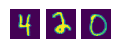

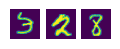

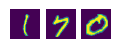

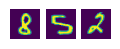

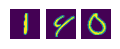

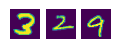

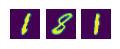

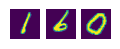

In [ ]:
# Lavorando con l'intero dataset
# Shuffle = True

tf.config.run_functions_eagerly(True)
#Tensorflow 2 has a config option to run functions "eagerly" which will enable getting Tensor values via .numpy() method.
# serve per l'istruzione : print(tf.keras.backend.get_value(x))


model = tf.keras.models.Sequential()
#Layer1
model.add(tf.keras.layers.Dense(units=64,       # units = il numero dei nodi - ovvero l'output space -
                                  input_dim=n_layers[0],   # input_dim = dimensioni del Input Layer, oppure, Number of Input Feature model
                                  kernel_initializer=initializers.RandomNormal(mean=0.0, stddev=0.01, seed=None),
                                  bias_initializer=initializers.Zeros(),
                                  activation='relu') )

##Layer2
model.add(tf.keras.layers.Dense(units=32,
                                  input_dim=64,
                                  kernel_initializer=initializers.RandomNormal(mean=0.0, stddev=0.01, seed=None),
                                  bias_initializer=initializers.Zeros(),
                                  activation='relu') )

##Layer3
model.add(tf.keras.layers.Dense(units=n_layers[3],
                                  input_dim=32,
                                  kernel_initializer=initializers.RandomNormal(mean=0.0, stddev=0.01, seed=None),
                                  bias_initializer=initializers.Zeros(),
                                  activation='softmax') )


class printeverybatch(tf.keras.Model):
    def train_step(self, data):

        x, y = data

        tf.print('\nNew batch:')
        tf.print('Input Picture')

        #tf.print(x,summarize=-1, name='x_value')

        x1 = tf.keras.backend.get_value(x[0])
        x2 = tf.keras.backend.get_value(x[1])
        x3 = tf.keras.backend.get_value(x[2])


        xf =  x1.reshape(28, 28)
        xf2 = x2.reshape(28, 28)
        xf3 = x3.reshape(28, 28)


        plt.figure(figsize=[1.3, 1.3])
        c = 1
        for i in (xf,xf2,xf3):
          ax = plt.subplot(1,3,c)
          c= c + 1
          image = i
          plt.imshow(image)
          plt.axis('off')


        #plt.figure(figsize=[0.6, 0.6])
        #plt.imshow(xf, cmap=plt.get_cmap('gray'))
        #plt.imshow(xf)
        #plt.axis('off')
        #plt.show()

        tf.print('\nInput Label')
        tf.print(y,summarize=-1)
        return super().train_step(data)


class MyCustomCallback(tf.keras.callbacks.Callback):
  def on_train_batch_end(self, batch, logs=None):
    #keys = list(logs.keys())
    print("------------------ batch: {} ------------------\n".format(batch))


modelp=printeverybatch(inputs = model.input, outputs = model(model.input))



modelp.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                loss= tf.keras.losses.CategoricalCrossentropy(from_logits=False),
                metrics=[tf.keras.metrics.CategoricalAccuracy()])


num_iterations = 2
learning_rate=0.01
my_batch_size= 3
nr_steps_epoch = 4

modelp.fit(x=xtrain,
                    y=label_train,
                    batch_size=my_batch_size,
                    epochs=num_iterations,
                    shuffle=True,
                    steps_per_epoch = nr_steps_epoch,
                    callbacks=[MyCustomCallback()],
                    verbose=2) # Verbosity mode : "auto", 0, 1, or 2.




Dataset dopo del training



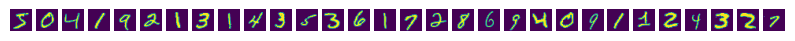

In [ ]:
#Nota
#Il dataset dopo del training non cambia, shuffle=True riguarda solo model.fit()

print("\nDataset dopo del training\n")
plt.figure(figsize=(10, 20))
for i in range(30):
    ax = plt.subplot(1, 30, i + 1)
    image = np.squeeze(xtrain[i])
    image = image.reshape(28, 28)
    plt.imshow(image)
    plt.axis('off')

Considerazioni dopo diverse sperimentazioni

Riferimento : l'intero MNIST database

$\;$

"Shuffle = False"

Settando i parametri


         num_iterations = 3
         learning_rate=0.01
         my_batch_size= 1
         nr_steps_epoch = 5
         Shuffle = False



L'estrazione dei 15 campioni restituisce sempre i primi 15 elementi del dataset in input, elaborati -con processo ottimizzazione- uno per volta (my_batch_size= 1); 5 per ogni epoca.


Eseguendo il codice più volte, si osserva che i 15 campioni estratti rimangono sempre gli stessi, e seguono l'ordine presente nel dataset


Settando i parametri


         num_iterations = 2
         learning_rate=0.01
         my_batch_size= 3
         nr_steps_epoch = 5
         Shuffle = False



L'estrazione dei 30 campioni restituisce sempre i primi 30 elementi del dataset in input, con lo stesso identico ordine.

Eseguendo il codice più volte, si osserva che i 30 campioni estratti rimangono sempre gli stessi, e seguono l'ordine presente nel dataset. Vedi figura sotto:

<div>
<img src="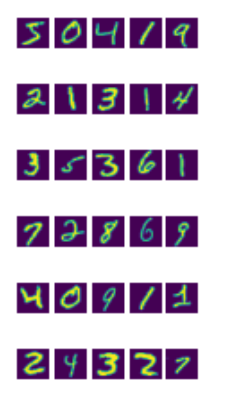
", width="200">
</div>

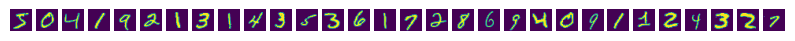

In [ ]:
# Nota l'orinde di estrazione con Shuffle = False, nel training precedente,
# è esattamente lo stesso ordine del dataset dato in input
plt.figure(figsize=(10, 20))
for i in range(30):
    ax = plt.subplot(1, 30, i + 1)
    image = np.squeeze(xtrain[i])
    image = image.reshape(28, 28)
    plt.imshow(image)
    plt.axis('off')


$\;$

"Shuffle = True":


Settando i parametri


         num_iterations = 3
         learning_rate=0.01
         my_batch_size= 1
         nr_steps_epoch = 5
         Shuffle = True


Ogni epoca è composta da 5 campioni, per ognuno (my_batch_size= 1) dei campioni si attiva il processo ottimizzazione. Ci sono un totale di 3 iterazioni o epoche.

Tutti i 15 campioni estratti sono differenti tra loro.





Settando i parametri


         num_iterations = 3
         learning_rate=0.01
         my_batch_size= 3
         nr_steps_epoch = 5
         Shuffle = True



Ogni epoca è composta da 15 campioni (che sono tutti diversi tra loro, non ci sono ripetizioni), per ogni 3 (my_batch_size= 3) campioni si attiva il processo ottimizzazione. Ci sono un totale di 3 iterazioni o epoche.

Tutti i 45 campioni estratti sono differenti tra loro.



####L'uso di Callback objects in custom training loop


https://github.com/keras-team/keras/blob/v3.1.1/keras/callbacks/callback.py#L88-L89


In [ ]:
class MyCallback(tf.keras.callbacks.Callback):

    def __init__(self, data, patience=0):
        self.data = data
        super(MyCallback, self).__init__()

    def on_train_batch_begin(self, batch, logs=None):
        if np.random.random() > 0.993 :
           print("\n")
           print("Info su output dell'ultima layer : ",model.layers[2].output)
           print("self.params = ",self.params)
           print("data.shape : ",self.data.shape )
           print("\n")


####Fase di Training

In [ ]:
num_iterations = 20
my_batch_size = 8
nr_step_epoch = 120


#Training
history = model.fit(x=xtrain,
                    y=label_train,
                    batch_size=my_batch_size,
                    epochs=num_iterations,
                    shuffle=True,
                    steps_per_epoch = nr_step_epoch,
                    callbacks=[MyCallback(xtrain)],
                    validation_split=0.1,
                    verbose="auto") # Verbosity mode : "auto", 0, 1, or 2.

 #
 # NOTE sui parametri inseriti in model.fit()
 #
 # epochs =	Integer.
 # Number of epochs to train the model. An epoch is an iteration over the entire x and y data provided
 # (unless the steps_per_epoch flag is set to something other than None).
 # In pratica, a meno che non vi siano diverse specifiche in steps_per_epoch, per ogni epoca si intende l'intero dataset immesso in x e y).

 # steps_per_epoch = Integer or None.
 # Total number of steps (batches of samples) before declaring one epoch finished and starting the next epoch.
 # When training with input tensors such as backend-native tensors, the default None is equal to the
 # number of samples in your dataset divided by the batch size.
 # If steps_per_epoch is None, the epoch will run until the input dataset is exhausted.
 # If steps_per_epoch=-1 the training will run indefinitely with an infinitely repeating dataset.

 # shuffle =  Boolean,
 # Shuffle argument in model.fit is set to True (which is the default), the training data will be randomly shuffled at each epoch.
 # Has no effect when steps_per_epoch is not None.
 #https://faroit.com/keras-docs/2.0.1/getting-started/faq/#is-the-data-shuffled-during-training
 #Alternativa:
 #https://www.tensorflow.org/guide/data?hl=it

 #validation_split = Float between 0 and 1.
 # Fraction of the training data to be used as validation data.
 #The model will set apart this fraction of the training data, will not train on it,
 #and will evaluate the loss and any model metrics on this data at the end of each epoch. The validation data is selected from the last samples in the x and y data provided, before shuffling.
 #https://keras.io/api/models/model_training_apis/

 #https://faroit.com/keras-docs/2.1.2/models/sequential/

Epoch 1/20
120/120 [==============================] - 4s 26ms/step - loss: 1.3337 - categorical_accuracy: 0.5979 - val_loss: 0.6060 - val_categorical_accuracy: 0.8368
Epoch 2/20
 31/120 [======>.......................] - ETA: 0s - loss: 0.6757 - categorical_accuracy: 0.7903

Info su output dell'ultima layer :  KerasTensor(type_spec=TensorSpec(shape=(None, 10), dtype=tf.float32, name=None), name='dense_2/Softmax:0', description="created by layer 'dense_2'")
self.params =  {'verbose': 1, 'epochs': 20, 'steps': 120}
data.shape :  (60000, 784)


120/120 [==============================] - 2s 14ms/step - loss: 0.5491 - categorical_accuracy: 0.8354 - val_loss: 0.4032 - val_categorical_accuracy: 0.8843
Epoch 3/20
120/120 [==============================] - 1s 11ms/step - loss: 0.4701 - categorical_accuracy: 0.8542 - val_loss: 0.3347 - val_categorical_accuracy: 0.9043
Epoch 4/20
120/120 [==============================] - 1s 11ms/step - loss: 0.3406 - categorical_accuracy: 0.9042 - val_loss: 0.26

In [ ]:
# Record the training / validation loss / accuracy at each epoch
# History attribute containing the lists of successive losses and other metrics.
hist = pd.DataFrame(history.history)
hist.head(7)

,loss,categorical_accuracy,val_loss,val_categorical_accuracy
0,1.333732,0.597917,0.606044,0.836833
1,0.549126,0.835417,0.403152,0.884333
2,0.470073,0.854167,0.334669,0.904333
3,0.340588,0.904167,0.267819,0.920333
4,0.433520,0.887500,0.302650,0.912333
5,0.332888,0.893750,0.284144,0.916000
6,0.363551,0.893750,0.246698,0.927333


In [ ]:
# Conserva i valori dei model's weight e bias.
V = model.get_weights()

Salva tutto modello su file

In [ ]:
#Memorizza la rete neurale completa nel formato file HDF5
save_path = "."
model.save(os.path.join(save_path,"network.h5"))

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


####ModelCheckpoint

https://keras.io/api/callbacks/model_checkpoint/

In [ ]:
checkpoint_filepath = '/tmp/ckpt/checkpoint.model.keras'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor='val_loss',
    mode='min',
    save_best_only=True)

# Model is saved at the end of every epoch, if it's the best seen so far.
num_iterations = 30
my_batch_size = 64

model.fit(x=xtrain,
             y=label_train,
             batch_size=my_batch_size,
             epochs=num_iterations,
             shuffle=True,
             steps_per_epoch = None,
             validation_split=0.1,
             verbose=0,
             callbacks=[model_checkpoint_callback]) # # Pass callback to training

# The model (that are considered the best) can be loaded as -
my2model = tf.keras.models.load_model(checkpoint_filepath)

In [ ]:
# Alternatively, one could checkpoint just the model weights as -
checkpoint_filepath = '/tmp/ckpt/checkpoint.weights.h5'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

# Model weights are saved at the end of every epoch, if it's the best seen
# so far.
num_iterations = 30
my_batch_size = 64

model.fit(x=xtrain,
             y=label_train,
             batch_size=my_batch_size,
             epochs=num_iterations,
             shuffle=True,
             steps_per_epoch = None,
             validation_split=0.1,
             verbose=0,
             callbacks=[model_checkpoint_callback])

# The model weights (that are considered the best) can be loaded as -
my2model = model.load_weights(checkpoint_filepath)

####Carica il modello salvato

In [ ]:
NN2 = tf.keras.models.load_model(os.path.join(save_path,"network.h5"))

In [ ]:
#Test se i modelli coincidono
ri = np.random.randint(low=0, high=len(xtest))

x = xtest[ri]
x = tf.reshape(x, [1, -1])

pred1 =  model.predict(x)
pred2 = NN2.predict(x)

print(pred1 == pred2)

1/1 [==============================] - 0s 454ms/step
[[ True  True  True  True  True  True  True  True  True  True]]


####Test Campione

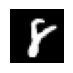

1/1 [==============================] - 0s 27ms/step
TrueLabel:   [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
Previsione:  [[0.   0.   0.   0.   0.   0.01 0.   0.   0.99 0.  ]]


In [ ]:
ri = np.random.randint(low=0, high=len(xtest))

x = xtest[ri]

xf = x.reshape(28, 28)
plt.figure(figsize=[0.7, 0.7])
plt.imshow(xf, cmap=plt.get_cmap('gray'))
plt.axis('off')
plt.show()

x = tf.reshape(x, [1, -1])
y = label_test[ri]
yy = model.predict(x)
print("TrueLabel:  ",y)
print("Previsione: ",yy.round(2))


####Accuracy

In [ ]:
score = model.evaluate(xtest, label_test, len(xtest)) # calcola accuracy di tutto il dataset test in una volta sola - sfruttare la Vettorizzazione
# model.evaluate(xtest, label_test,1) # calcola accuracy di un elemento per volta di tutto il dataset test, stesso risultato di sopra ma necessita più tempo

print("Test loss:", score[0])
print("Test accuracy:", score[1])


1/1 [==============================] - 0s 256ms/step - loss: 0.1850 - categorical_accuracy: 0.9443
Test loss: 0.1849636435508728
Test accuracy: 0.9442999958992004


In [ ]:
# tf.keras.metrics.Accuracy() - vs. -  tf.keras.metrics.CategoricalAccuracy()

m1 = tf.keras.metrics.Accuracy()
m1.update_state(model.predict(xtest), label_test)
a  = m1.result()
print("Accuracy su tutto il test dataset :",a.numpy())

print("")

m2 = tf.keras.metrics.CategoricalAccuracy()

m2.update_state(model.predict(xtest), label_test)
a2  = m2.result()
print("Accuracy su tutto il test dataset :",a2.numpy())



313/313 [==============================] - 2s 6ms/step
Accuracy su tutto il test dataset : 0.0

313/313 [==============================] - 1s 3ms/step
Accuracy su tutto il test dataset : 0.9443


tf.keras.metrics.CategoricalAccuracy() offre lo stesso risultato del codice sottostante, con un notevole risparmio di tempo.

Mentre tf.keras.metrics.Accuracy() richiede che le predizioni coincidano perfettamente con le etichette reali per considerarle corrette (necessita di una corrispondenza esatta!)

In [ ]:
# codice di sotto, fa lo stesso lavoro di tf.keras.metrics.CategoricalAccuracy()
c=0
lt =  len(xtest)

for i in range(lt):
  x = tf.reshape(xtest[i], [1, -1])
  predicted_digit = tf.argmax(my_model.predict(x),1)
  actual_digit = tf.argmax(label_test[i])
  if predicted_digit.numpy()[0] == actual_digit.numpy():
     c = c + 1
print("Accuracy su tutto il test dataset :", c/lt)

####Grafici

In [ ]:
# list all data in history
print(history.history.keys())

dict_keys(['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy'])


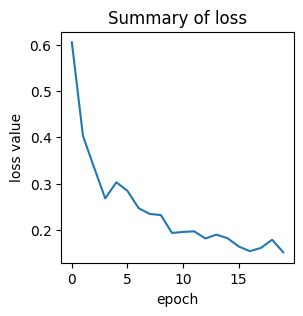

In [ ]:
plt.figure(figsize=(3, 3))

plt.title('Summary of loss')
plt.ylabel('loss value')
plt.xlabel('epoch')

plt.plot(range(num_iterations), history.history['val_loss'])

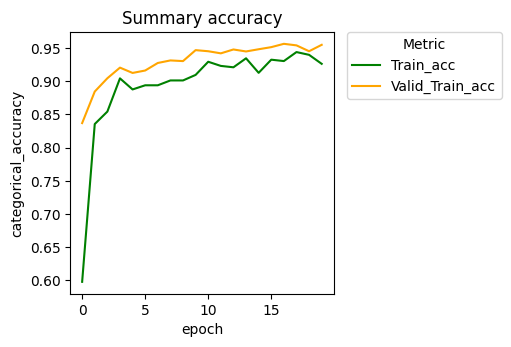

In [ ]:
plt.figure(figsize=(3.4, 3.4))

plt.title('Summary accuracy')
plt.ylabel('categorical_accuracy')
plt.xlabel('epoch')


plt.plot(history.history['categorical_accuracy'], label='Train_acc', color='green')
plt.plot(history.history['val_categorical_accuracy'],label='Valid_Train_acc', color='orange')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, title='Metric' )
plt.show()


####Note conclusive



In questa sezione non ho trattato la **Regularization**, un insieme di tecniche volte a ridurre l'overfitting nei modelli di machine learning.

La natura introduttiva del corso ha reso opportuno non approfondire questo argomento, che comunque merita attenzione. In generale, le tecniche di Regularization riducono leggermente l'accuratezza del modello durante l'addestramento, ma ne migliorano la capacità di generalizzare a nuovi dati. Esistono due categorie principali; norm-based: (esempio: L1 o L2 Regularization) utilizza la funzione di loss per penalizzare modelli.
Stochastic: questa categoria include tecniche come il Dropout, che disattivano casualmente alcuni neuroni durante l'addestramento.